In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from openbb import obb
import statsmodels.api as sm
from statsmodels import regression
from statsmodels.regression.rolling import RollingOLS
obb.user.preferences.output_type = "dataframe"
import warnings


In [2]:
warnings.filterwarnings("ignore")
obb.user.preferences.output_type = "dataframe"

In [3]:
symbols = ["NEM", "RGLD", "SSRM", "CDE", "LLY", "UNH", "JNJ", "MRK", "SPY"]

In [4]:
data = obb.equity.price.historical(
    symbol=symbols,
    start_date="2015-01-01",
    end_date="2022-12-31",
    provider="cboe",
).pivot(columns="symbol", values="close")

In [5]:
data

symbol,CDE,JNJ,LLY,MRK,NEM,RGLD,SPY,SSRM,UNH
date,,,,,,,,,
2015-01-02,5.30,103.72,69.55,57.19,18.46,64.31,205.43,5.28,100.78
2015-01-05,5.44,102.99,68.86,58.04,18.58,65.85,201.72,5.41,99.12
2015-01-06,5.69,102.48,69.21,60.32,19.39,66.93,199.82,5.85,98.92
2015-01-07,5.61,104.76,68.72,61.61,19.21,66.07,202.31,5.67,99.93
2015-01-08,5.60,105.59,70.36,62.85,19.10,65.42,205.90,5.51,104.70
...,...,...,...,...,...,...,...,...,...
2022-12-23,3.43,177.48,367.90,111.86,47.85,112.84,382.91,15.95,531.31
2022-12-27,3.69,177.43,364.88,112.12,48.75,114.41,381.40,16.34,531.99
2022-12-28,3.47,176.66,365.22,111.08,47.37,111.50,376.66,15.70,528.45


In [6]:
monthly_returns = data.asfreq("ME").pct_change(fill_method=None).to_period("M")

In [7]:
bench = monthly_returns.pop("SPY")
R = monthly_returns.mean(axis=1)
active = (R - bench).dropna()

In [8]:
active

date
2015-04    0.054722
2015-07   -0.129016
2015-08    0.035928
2015-09   -0.007675
2015-12    0.026602
2016-03    0.027442
2016-06    0.196269
2016-09    0.015827
2016-10   -0.040621
2016-11   -0.077048
2017-02   -0.054038
2017-03   -0.008180
2017-06   -0.004692
2017-07    0.012722
2017-08    0.029315
2017-11   -0.030734
2018-02   -0.024140
2018-05   -0.012621
2018-08   -0.084703
2018-11    0.008059
2018-12    0.120167
2019-01   -0.027972
2019-02   -0.029605
2019-05    0.043535
2019-10    0.025727
2020-01   -0.046278
2020-04    0.125764
2020-07    0.059689
2020-08   -0.064567
2020-09   -0.020517
2020-12    0.072391
2021-04   -0.042029
2021-09   -0.038899
2021-12    0.009838
2022-01    0.016856
2022-02    0.068695
2022-03    0.073874
2022-06    0.025464
2022-09    0.150409
2022-10   -0.016084
2022-11    0.000897
Freq: M, dtype: float64

In [9]:
factors = (
    pdr.get_data_famafrench(
        "F-F_Research_Data_Factors",
        start="2015-01-01",
        end="2022-12-31",
    )[0][1:]
    / 100
)
SMB = factors.loc[active.index, "SMB"]
HML = factors.loc[active.index, "HML"]

In [10]:
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2015-02,0.0613,0.0063,-0.0186,0.0000
2015-03,-0.0112,0.0304,-0.0038,0.0000
2015-04,0.0059,-0.0306,0.0182,0.0000
2015-05,0.0136,0.0094,-0.0115,0.0000
2015-06,-0.0153,0.0291,-0.0079,0.0000
...,...,...,...,...
2022-08,-0.0377,0.0140,0.0029,0.0019
2022-09,-0.0935,-0.0082,0.0002,0.0019
2022-10,0.0783,0.0007,0.0806,0.0023


In [11]:
factors = (
    pdr.get_data_famafrench(
        "F-F_Research_Data_Factors",
        start="2015-01-01",
        end="2022-12-31",
    )[0][1:]
    / 100
)
SMB = factors.loc[active.index, "SMB"]
HML = factors.loc[active.index, "HML"]

In [29]:
SMB

date
2015-04   -0.0306
2015-07   -0.0417
2015-08    0.0033
2015-09   -0.0262
2015-12   -0.0285
2016-03    0.0082
2016-06    0.0061
2016-09    0.0212
2016-10   -0.0440
2016-11    0.0571
2017-02   -0.0205
2017-03    0.0114
2017-06    0.0225
2017-07   -0.0150
2017-08   -0.0167
2017-11   -0.0054
2018-02    0.0026
2018-05    0.0526
2018-08    0.0115
2018-11   -0.0068
2018-12   -0.0237
2019-01    0.0288
2019-02    0.0206
2019-05   -0.0131
2019-10    0.0029
2020-01   -0.0313
2020-04    0.0245
2020-07   -0.0230
2020-08   -0.0028
2020-09   -0.0003
2020-12    0.0479
2021-04   -0.0320
2021-09    0.0067
2021-12   -0.0164
2022-01   -0.0596
2022-02    0.0219
2022-03   -0.0166
2022-06    0.0218
2022-09   -0.0082
2022-10    0.0007
2022-11   -0.0351
Freq: M, Name: SMB, dtype: float64

In [12]:
help(pdr.get_data_famafrench)


Help on function get_data_famafrench in module pandas_datareader.data:

get_data_famafrench(*args, **kwargs)



In [13]:
df = pd.DataFrame(
    {
        "R": active,
        "SMB": SMB,
        "HML": HML,
    },
    index=active.index,
).dropna()

In [14]:
df

,R,SMB,HML
date,,,
2015-04,0.054722,-0.0306,0.0182
2015-07,-0.129016,-0.0417,-0.0413
2015-08,0.035928,0.0033,0.0277
2015-09,-0.007675,-0.0262,0.0056
2015-12,0.026602,-0.0285,-0.0261
2016-03,0.027442,0.0082,0.0119
2016-06,0.196269,0.0061,-0.0148
2016-09,0.015827,0.0212,-0.0124
2016-10,-0.040621,-0.0440,0.0409


In [15]:
b1, b2 = regression.linear_model.OLS(df.R, df[["SMB", "HML"]]).fit().params

In [16]:
display(f"Sensitivities of active returns to factors:\nSMB: {b1}\nHML: {b2}")

'Sensitivities of active returns to factors:\nSMB: 0.08758425642803955\nHML: -0.02567100575093394'

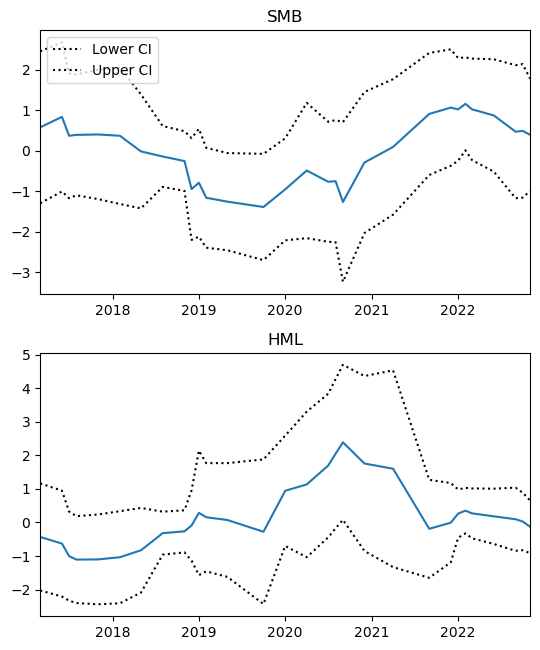

In [17]:
exog = sm.add_constant(df[["SMB", "HML"]])
rols = RollingOLS(active, exog, window=12)
rres = rols.fit()
fig = rres.plot_recursive_coefficient(variables=["SMB", "HML"], figsize=(5.5, 6.6))

In [18]:
F1 = df.SMB
F2 = df.HML
cov = np.cov(F1, F2)
ar_squared = (active.std()) ** 2
mcar1 = (b1 * (b2 * cov[0, 1] + b1 * cov[0, 0])) / ar_squared
mcar2 = (b2 * (b1 * cov[0, 1] + b2 * cov[1, 1])) / ar_squared

In [19]:
display(f"SMB risk contribution: {mcar1}")
display(f"HML risk contribution: {mcar2}")
display(f"Unexplained risk contribution: {1 - (mcar1 + mcar2)}")

'SMB risk contribution: 0.0013584397356513202'

'HML risk contribution: 0.0002842684433330796'

'Unexplained risk contribution: 0.9983572918210156'

In [20]:
covariances = (df[["SMB", "HML"]].rolling(window=12).cov()).dropna()

In [21]:
active_risk_squared = (active.rolling(window=12).std() ** 2).dropna()

In [22]:
betas = pd.concat([rres.params.SMB, rres.params.HML], axis=1).dropna()

In [23]:
MCAR = pd.DataFrame(index=betas.index, columns=betas.columns)

In [24]:
for factor in betas.columns:
    for t in betas.index:
        # Compute the sum of the betas and covariances
        s = np.sum(betas.loc[t] * covariances.loc[t][factor])
        # Get the beta
        b = betas.loc[t][factor]
        # Get active risk squared
        AR = active_risk_squared.loc[t]
        # Put them all together to estimate FMCAR on that date
        MCAR[factor][t] = b * s / AR

<Axes: xlabel='date'>

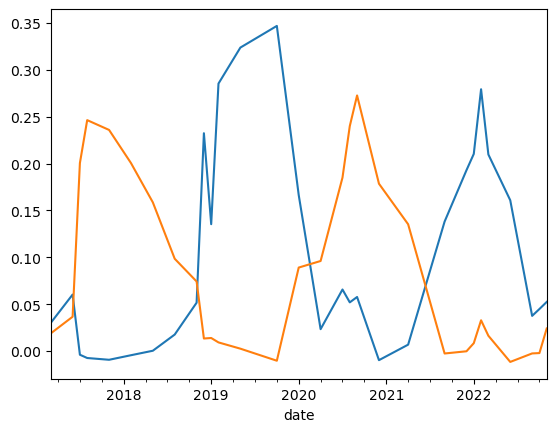

In [25]:
MCAR.SMB.plot()
MCAR.HML.plot()

In [26]:
# Plot the unexplained risk contribution

<Axes: xlabel='date'>

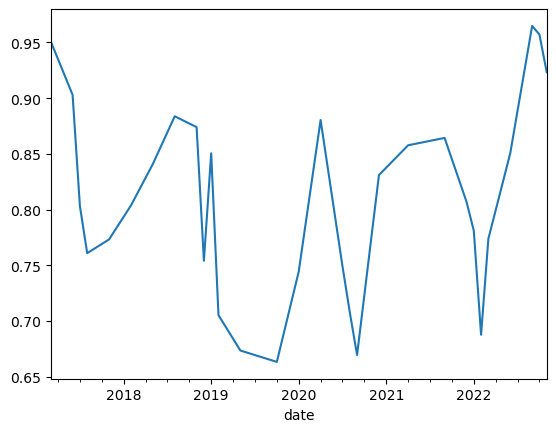

In [27]:
(1 - (MCAR.SMB + MCAR.HML)).plot()
